# Import Lib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

# Reading Dataset

In [ ]:
df=pd.read_excel(r"path to dataset")  # reading excel file
pd.set_option("display.max_column",22)
df.head()     #to display top 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.5164


In [4]:
df.shape    #shape of dataframe

(9994, 21)

In [5]:
df.info()  #information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9985 non-null   float64       
 1   Order ID       9981 non-null   object        
 2   Order Date     9981 non-null   datetime64[ns]
 3   Ship Date      9979 non-null   datetime64[ns]
 4   Ship Mode      9975 non-null   object        
 5   Customer ID    9968 non-null   object        
 6   Customer Name  9937 non-null   object        
 7   Segment        9942 non-null   object        
 8   Country        9930 non-null   object        
 9   City           9949 non-null   object        
 10  State          9937 non-null   object        
 11  Postal Code    9957 non-null   float64       
 12  Region         9954 non-null   object        
 13  Product ID     9956 non-null   object        
 14  Category       9965 non-null   object        
 15  Sub-Category   9952 n

In [6]:
df.isnull().sum() #finding number of null values in each column

Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    57
Segment          52
Country          64
City             45
State            57
Postal Code      37
Region           40
Product ID       38
Category         29
Sub-Category     42
Product Name     58
Sales            62
Quantity         46
Discount         37
Profit           50
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100   #percentage of missing values in each columns

Row ID           0.090054
Order ID         0.130078
Order Date       0.130078
Ship Date        0.150090
Ship Mode        0.190114
Customer ID      0.260156
Customer Name    0.570342
Segment          0.520312
Country          0.640384
City             0.450270
State            0.570342
Postal Code      0.370222
Region           0.400240
Product ID       0.380228
Category         0.290174
Sub-Category     0.420252
Product Name     0.580348
Sales            0.620372
Quantity         0.460276
Discount         0.370222
Profit           0.500300
dtype: float64

In [8]:
df.duplicated().sum()  #duplicate rows

10

In [9]:
for i in df.select_dtypes(include="object").columns:   #counts number of unique values
    print(df[i].value_counts())
    print("***"*10)

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
US-2015-126977    10
                  ..
US-2017-107636     1
US-2014-165862     1
CA-2016-101448     1
US-2017-117331     1
CA-2017-119914     1
Name: Order ID, Length: 5000, dtype: int64
******************************
Standard Class    5958
Second Class      1940
First Class       1534
Same Day           543
Name: Ship Mode, dtype: int64
******************************
WB-21850    37
AP-10915    35
PP-18955    34
JL-15835    34
MA-17560    34
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64
******************************
William Brown        37
Arthur Prichep       35
John Lee             34
Paul Prost           34
Matt Abelman         34
                     ..
Lela Donovan          1
Jocasta Rupert        1
Carl Jackson          1
Anthony O'Donnell     1
Ricardo Emerson       1
Name: Customer Name, Length: 792, dty

#Converting DataType of sales from object to float (datatype was object because there were some string values in column,this process convert string to nan )

In [10]:
df["Sales"]=pd.to_numeric(df["Sales"],errors='coerce')   
pro=df[df["Sales"].isna()]
print(pro)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
193    194.0  CA-2015-102281 2015-10-12 2015-10-14     First Class   
194    195.0  CA-2015-131457 2015-10-31 2015-11-06  Standard Class   
195    196.0  CA-2014-140004 2014-03-21 2014-03-25  Standard Class   
196    197.0  CA-2014-140004 2014-03-21 2014-03-25  Standard Class   
197    198.0  CA-2017-107720 2017-11-06 2017-11-13  Standard Class   
...      ...             ...        ...        ...             ...   
7177  7187.0  CA-2017-133102 2017-08-17 2017-08-24  Standard Class   
7178  7188.0  CA-2017-133102 2017-08-17 2017-08-24  Standard Class   
7179  7189.0  CA-2017-133102 2017-08-17 2017-08-24  Standard Class   
7180  7190.0  CA-2016-164399 2016-11-12 2016-11-15     First Class   
7181  7191.0  CA-2016-164399 2016-11-12 2016-11-15     First Class   

     Customer ID      Customer Name      Segment        Country  \
193     MP-17470        Mark Packer  Home Office  United States   
194     MZ-17515         

In [11]:
df.isnull().sum() #checking number of null values for eah column

Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    57
Segment          52
Country          64
City             45
State            57
Postal Code      37
Region           40
Product ID       38
Category         29
Sub-Category     42
Product Name     58
Sales            83
Quantity         46
Discount         37
Profit           50
dtype: int64

In [12]:
df[df["Row ID"]==6858] #checking row that has changed from string to nan

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6857,6858.0,CA-2017-128965,2017-04-17,2017-04-22,Standard Class,PS-18760,Pamela Stobb,Consumer,United States,Los Angeles,California,90008.0,West,OFF-PA-10004911,Office Supplies,Paper,Paper,NaN,28.14,3.0,0.0


In [13]:
df.dropna(subset=["Sales"],inplace=True)  #droping null values of sales(we cant impute data in sales(dependent variable) because it creates a arbitary values whih affects model prediction)

In [14]:
df.shape #shape of dataframe

(9911, 21)

In [15]:
df["Sales"].dtypes #cheking dataframe of sales column

dtype('float64')

In [16]:
df.isnull().sum() #checking number of null values

Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    46
Segment          41
Country          53
City             45
State            51
Postal Code      31
Region           31
Product ID       11
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
dtype: int64

In [17]:
df["City"].isnull().sum() #cheking number of null values in city

45

In [18]:
df["City"].unique() #hecking unique values in city column

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', nan, 'Aurora', 'Charlotte', 'Orland Park',
       'Urbandale', 'Columbus', 'Bristol', 'Wilmington', 'Bloomington',
       'Phoenix', 'Roseville', 'Independence', 'Pasadena', 'Newark',
       'Franklin', 'Scottsdale', 'San Jose', 'Edmond', 'Carlsbad',
       'San Antonio', 'Monroe', 'Fairfield', 'Grand Prairie', 'Denver',
       'Dallas', 'Whittier', 'Saginaw', 'Medina', 'Detroit', 'Tampa',
       'Santa Clara', 'Lakeville', 'San Diego', 'Brentwood',
       'Chapel Hill', 'Morristown', 'Cincinnati', 'Inglewood', 'Portland',
       'Tamarac', 'Colorado Springs

In [19]:
df.dropna(subset=["City"],inplace=True) #droped nan values in city 

In [20]:
df.isnull().sum() #checking null values 

Row ID            5
Order ID          9
Order Date        9
Ship Date        11
Ship Mode         8
Customer ID       5
Customer Name    23
Segment          18
Country          21
City              0
State             6
Postal Code       0
Region            0
Product ID        2
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
dtype: int64

In [21]:
df.shape #shape of dataframe

(9866, 21)

In [22]:
df["State"].isnull().sum() #checking null values in state

6

In [23]:
df["State"].unique() #finding unique values in state column

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Oregon', 'Massachusetts', 'Georgia', 'Nevada',
       'Rhode Island', nan, 'Mississippi', 'Arkansas', 'Montana',
       'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 24.849999999999998, 12.624, 89.584, 471.92,
       18.180000000000003, 31.744, 5.904, 621.7600000000001, 59.98, 48.87,
       154.9, 5.92, 30.18, 24.1, 8.78, 376.74, 29.52, 11.96,
       26.400000000000002, 'West Virginia'], dtype=object)

In [24]:
state_city=df[["State","City"]]  #created dataframe for state, city
unique_state_city=state_city.drop_duplicates() #drop dupliates
unique_state_city.head(10)  #hecking respective city name for state to change errors in state column 

,State,City
0,Kentucky,Henderson
2,California,Los Angeles
3,Florida,Fort Lauderdale
12,North Carolina,Concord
13,Washington,Seattle
14,Texas,Fort Worth
16,Wisconsin,Madison
17,Utah,West Jordan
18,California,San Francisco
21,Nebraska,Fremont


In [25]:
a=[24.849999999999998, 12.624, 89.584, 471.92,
       18.180000000000003, 31.744, 5.904, 621.7600000000001, 59.98, 48.87,
       154.9, 5.92, 30.18, 24.1, 8.78, 376.74, 29.52, 11.96,
       26.400000000000002]   #values are errors in state column
for i in a:
    print(df[df["State"]==i])

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
6972  6973.0  CA-2017-153822 2017-09-19 2017-09-25  Standard Class   

     Customer ID  Customer Name   Segment        Country     City  State  \
6972    AB-10105  Adrian Barton  Consumer  United States  Phoenix  24.85   

      Postal Code Region Product ID    Category Sub-Category  \
6972          5.0      0     7.7035  Technology       Phones   

                                   Product Name   Sales  Quantity  Discount  \
6972  Polycom VoiceStation 500 Conference phone  471.92       2.0       0.2   

      Profit  
6972  29.495  
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
6973  6974.0  CA-2017-153822 2017-09-19 2017-09-25  Standard Class   

     Customer ID  Customer Name   Segment        Country     City   State  \
6973    AB-10105  Adrian Barton  Consumer  United States  Phoenix  12.624   

      Postal Code Region Product ID         Category Sub-Category  \
6973          2.0    0.

In [26]:
df[df["State"].isnull()] #checking nul values in state

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,NaN,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.920,8.0,0.0,25.8984
423,424.0,CA-2017-125388,2017-10-19,2017-10-23,NaN,MP-17965,Michael Paige,Corporate,United States,Lawrence,NaN,1841.0,East,OFF-ST-10000918,Office Supplies,Storage,Crate-A-Files,32.700,3.0,0.0,8.5020
428,429.0,CA-2017-152275,2017-10-01,2017-10-08,Standard Class,KH-16630,Ken Heidel,Corporate,United States,San Antonio,NaN,78207.0,Central,OFF-AR-10000369,NaN,Art,Design Ebony Sketching Pencil,6.672,6.0,0.2,0.5004
430,431.0,US-2016-123750,2016-04-15,2016-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,NaN,28052.0,South,TEC-AC-10004659,Technology,NaN,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,7.0,0.2,76.6395
486,487.0,CA-2017-140963,2017-06-10,2017-06-13,First Class,MT-18070,Michelle Tran,Home Office,United States,Los Angeles,NaN,90045.0,West,TEC-PH-10001924,Technology,Phones,NaN,279.960,5.0,0.2,17.4975
659,660.0,CA-2015-146563,2015-08-24,2015-08-28,Standard Class,CB-12025,NaN,Consumer,United States,Arlington,NaN,76017.0,Central,OFF-ST-10001490,Office Supplies,NaN,"Hot File 7-Pocket, Floor Stand",999.432,7.0,0.2,124.9290


In [27]:
df[df["City"]=="Huntington Beach"].head(2) #checkin city name to replace nan with respective state name

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,NaN,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.92,8.0,0.0,25.8984
1890,1891.0,CA-2014-157623,2014-03-14,2014-03-18,Standard Class,DK-13225,Dean Katz,Corporate,United States,Huntington Beach,California,92646.0,West,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2.0,0.0,4.7520


In [28]:
df[df["State"]=="Maryland"].head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
887,888.0,CA-2017-150707,2017-10-14,2017-10-19,Standard Class,EL-13735,Ed Ludwig,Home Office,United States,Columbia,Maryland,21044.0,East,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",37.66,7.0,0.0,18.4534
1093,1094.0,CA-2015-165085,2015-12-27,2015-12-31,Standard Class,BT-11485,Brad Thomas,Home Office,United States,Clinton,Maryland,20735.0,East,OFF-PA-10000605,Office Supplies,Paper,Xerox 1950,28.90,5.0,0.0,14.1610
1094,1095.0,CA-2015-165085,2015-12-27,2015-12-31,Standard Class,BT-11485,Brad Thomas,Home Office,United States,Clinton,Maryland,20735.0,East,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,355.96,2.0,0.0,103.2284


In [29]:
city_to_state = {
    'Phoenix': 'Arizona',
    'Houston': 'Texas',
    'Gilbert': 'Arizona',
    'Jonesboro': 'Arkansas',
    'Atlanta': 'Georgia',
    'Los Angeles': 'California',
    'New York City': 'New York',
    'Detroit': 'Michigan',
    'Fort Lauderdale': 'Florida',
    'Hampton': 'Virginia',
    'Arlington':'Virginia',
    'Gastonia':'North Carolina', 
    'San Antonio':'Texas',
    'Lawrence':'Massachusetts',
    'Huntington Beach':'California'
}

# Update 'State' column for cities in city_to_state dictionary
df['State'] = df['City'].map(city_to_state).fillna(df['State'])

print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0        1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1        2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2        3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3        4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4        5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989     NaN             NaN        NaT        NaT  Standard Class   
9990     NaN             NaN        NaT        NaT    Second Class   
9991     NaN             NaN        NaT        NaT  Standard Class   
9992     NaN             NaN        NaT        NaT  Standard Class   
9993     NaN             NaN        NaT        NaT    Second Class   

     Customer ID    Customer Name      Segment        Country  \
0       CG-12520      Claire Gute     Consumer  United States   
1       CG-12520      Claire 

In [30]:
#checking changes
df[df["City"]=="Huntington Beach"].head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,California,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.92,8.0,0.0,25.8984
1890,1891.0,CA-2014-157623,2014-03-14,2014-03-18,Standard Class,DK-13225,Dean Katz,Corporate,United States,Huntington Beach,California,92646.0,West,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2.0,0.0,4.7520


In [31]:
df["State"].isnull().sum() #cheking number of nulls in state

0

In [32]:
#now null also chnaged
df[df["Row ID"]==107]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
106,107.0,CA-2017-119004,2017-11-23,2017-11-28,Standard Class,JM-15250,Janet Martin,Consumer,United States,Charlotte,North Carolina,28205.0,South,TEC-AC-10003499,Technology,Accessories,Memorex Mini Travel Drive 8 GB USB 2.0 Flash D...,74.112,8.0,0.2,17.6016


In [33]:
#drop 11.96 due to no name of state
df.drop(df[df["State"]==11.96].index,axis=0,inplace=True)

In [34]:
df["State"].unique() #now rechecking uniques values in state 

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Oregon', 'Massachusetts', 'Georgia', 'Nevada',
       'Rhode Island', 'Mississippi', 'Arkansas', 'Montana',
       'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 'West Virginia'], dtype=object)

In [35]:
df["Region"].unique() #hecking unique values in region(found some errors)

array(['South', 'West', 'Central', 'East', 0, 0.2, 0.7, 0.1], dtype=object)

In [36]:
df["Region"].isnull().sum() #checking nan values in region column

0

In [37]:
a = [0, 0.2, 0.7, 0.1]
cities_by_region = {}

for i in a:
    filtered_df = df[df["Region"] == i]
    cities_by_region[i] = filtered_df["City"].tolist()

print(cities_by_region)


{0: ['Phoenix', 'New York City', 'New York City', 'Detroit', 'Detroit', 'Detroit', 'Detroit', 'Detroit', 'Fort Lauderdale', 'Hampton'], 0.2: ['Phoenix', 'Houston', 'Gilbert', 'Jonesboro', 'Atlanta', 'Los Angeles'], 0.7: ['Gilbert'], 0.1: ['Detroit']}


In [38]:
df[df["City"]=="Huntington Beach"].head(2) #checking region for city 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,California,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.92,8.0,0.0,25.8984
1890,1891.0,CA-2014-157623,2014-03-14,2014-03-18,Standard Class,DK-13225,Dean Katz,Corporate,United States,Huntington Beach,California,92646.0,West,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2.0,0.0,4.7520


In [39]:
city_to_region = {
    'Phoenix': 'West',
    'Houston': 'Central',
    'Gilbert': 'West',
    'Jonesboro': 'South',
    'Atlanta': 'South',
    'Los Angeles': 'West',
    'New York City': 'East',
    'Detroit': 'Central',
    'Fort Lauderdale': 'South',
    'Hampton': 'South'
}

# Update 'Region' column permanently
df['Region'] = df['City'].map(city_to_region).fillna(df['Region'])

In [40]:
df["Region"].unique() #cheking unique values in region

array(['South', 'West', 'Central', 'East'], dtype=object)

In [41]:
df.shape #cheking shape of dataframe

(9865, 21)

In [42]:
df.dropna(subset=["Order Date","Ship Date"],inplace=True) #droping null values in order date,ship date

In [43]:
df.isnull().sum() #checking null values in columns

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         4
Customer ID       1
Customer Name    19
Segment          15
Country          18
City              0
State             0
Postal Code       0
Region            0
Product ID        2
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
dtype: int64

In [44]:
#data formating(creating new columns from existing data)
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

df["order_year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month
df["order_date"]=df["Order Date"].dt.day

df["Ship_year"]=df["Ship Date"].dt.year
df["Ship_month"]=df["Ship Date"].dt.month
df["Ship_date"]=df["Ship Date"].dt.day

In [45]:
df["Postal Code"].isnull().sum() #sum of null values in Postal code

0

In [46]:
s=df["Postal Code"].astype(int) #unique postal code
s.unique()

array([42420, 90036, 33311, 90032, 28027, 98103, 76106, 53711, 84084,
       94109, 68025, 19140, 84057, 90049, 77095, 75080, 77041, 60540,
       32935, 55122, 48185, 19901, 47150, 10024, 12180, 90004, 60610,
       85234, 22153, 10009, 49201, 38109, 77070, 35601, 94122, 27707,
       60623, 29203, 55901, 80013, 28205, 60462, 10035, 50322, 43229,
       37620, 19805, 61701, 85023, 95661, 64055, 91104, 43055, 53132,
       85254, 95123, 98105, 98115, 73034, 90045, 19134, 88220, 78207,
       77036, 62521, 71203,  6824, 75051, 80219, 75220, 37064, 90604,
       48601, 44256, 48227, 38401, 33614, 95051, 55044, 92037, 77506,
       94513, 27514,  7960, 45231, 94110, 90301, 97206, 33319, 80906,
        7109, 48180,  8701, 22204, 80004,  7601, 33710, 19143, 90805,
       92345, 37130, 78745,  1852, 31907,  6040, 78550, 85705, 62301,
        2038, 33024, 98198, 61604, 89115,  2886, 33180, 28403, 92646,
       40475, 80027,  1841, 39212, 48187, 10801, 28052, 32216, 47201,
       13021, 44312,

In [47]:
a=[5,2,4,9,3,1] #errors in postal code
c=df[df["Postal Code"].isin(a)]
c

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
6972,6973.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Polycom VoiceStation 500 Conference phone,471.920,2.0,0.2,29.4950,2017,9,19,2017,9,25
6973,6974.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Plastic Binding Combs,18.180,4.0,0.7,-13.9380,2017,9,19,2017,9,25
6974,6975.0,CA-2017-146185,2017-09-15,2017-09-19,Standard Class,CC-12145,Charles Crestani,Consumer,United States,Houston,Texas,...,Prismacolor Color Pencil Set,31.744,2.0,0.2,8.3328,2017,9,15,2017,9,19
6975,6976.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Avery 501,5.904,2.0,0.2,1.9926,2015,6,28,2015,7,2
6976,6977.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Electrix Halogen Magnifier Lamp,621.760,4.0,0.2,46.6320,2015,6,28,2015,7,2
6977,6978.0,US-2016-119298,2016-11-25,2016-11-28,First Class,EP-13915,Emily Phan,Consumer,United States,Jonesboro,Arkansas,...,OtterBox Defender Series Case - Samsung Galaxy S4,59.980,2.0,0.0,17.9940,2016,11,25,2016,11,28
6978,6979.0,CA-2017-155159,2017-11-25,2017-11-29,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Atlanta,Georgia,...,"Wirebound Message Book, 4 per Page",48.870,9.0,0.0,23.9463,2017,11,25,2017,11,29
6979,6980.0,CA-2017-149076,2017-01-14,2017-01-19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Los Angeles,California,...,Xerox 19,154.900,5.0,0.0,69.7050,2017,1,14,2017,1,19
6980,6981.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Binder Clips by OIC,5.920,4.0,0.0,2.8416,2014,11,7,2014,11,8
6981,6982.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Riverleaf Stik-Withit Designer Note Cubes,30.180,3.0,0.0,13.8828,2014,11,7,2014,11,8


In [48]:
#finding most frequent postal code for city
cities = ["Phoenix", "Houston", "Gilbert", "Jonesboro", "Atlanta", "Los Angeles", "New York City", "Detroit", "Fort Lauderdale", "Abilene", "Hampton"]

for city in cities:
    filtered_df = df[df["City"] == city]
    if filtered_df.empty:
        print(f"No rows found for city: {city}")
    else:
        postal_code_mode = filtered_df["Postal Code"].mode()[0]
        print(f"Most frequent postal code for city {city}: {postal_code_mode}")

Most frequent postal code for city Phoenix: 85023.0
Most frequent postal code for city Houston: 77041.0
Most frequent postal code for city Gilbert: 85234.0
Most frequent postal code for city Jonesboro: 72401.0
Most frequent postal code for city Atlanta: 30318.0
Most frequent postal code for city Los Angeles: 90049.0
Most frequent postal code for city New York City: 10035.0
Most frequent postal code for city Detroit: 48227.0
Most frequent postal code for city Fort Lauderdale: 33311.0
No rows found for city: Abilene
Most frequent postal code for city Hampton: 23666.0


In [49]:
city_to_region = {
    'Phoenix': 85023.0,
    'Houston': 77041.0,
    'Gilbert': 85234.0,
    'Jonesboro': 72401.0,
    'Atlanta': 30318.0,
    'Los Angeles': 90049.0,
    'New York City': 10035.0,
    'Detroit': 48227.0,
    'Fort Lauderdale': 33311.0,
    'Abilene': 77041.0,
    'Hampton': 23666.0
}

# Update 'Region' column permanently
c['Postal Code'] = c['City'].map(city_to_region).fillna(c['Postal Code'])

C:\Users\ganesh\AppData\Local\Temp\ipykernel_54552\1011837133.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Postal Code'] = c['City'].map(city_to_region).fillna(c['Postal Code'])


In [50]:
c

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
6972,6973.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Polycom VoiceStation 500 Conference phone,471.920,2.0,0.2,29.4950,2017,9,19,2017,9,25
6973,6974.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Plastic Binding Combs,18.180,4.0,0.7,-13.9380,2017,9,19,2017,9,25
6974,6975.0,CA-2017-146185,2017-09-15,2017-09-19,Standard Class,CC-12145,Charles Crestani,Consumer,United States,Houston,Texas,...,Prismacolor Color Pencil Set,31.744,2.0,0.2,8.3328,2017,9,15,2017,9,19
6975,6976.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Avery 501,5.904,2.0,0.2,1.9926,2015,6,28,2015,7,2
6976,6977.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Electrix Halogen Magnifier Lamp,621.760,4.0,0.2,46.6320,2015,6,28,2015,7,2
6977,6978.0,US-2016-119298,2016-11-25,2016-11-28,First Class,EP-13915,Emily Phan,Consumer,United States,Jonesboro,Arkansas,...,OtterBox Defender Series Case - Samsung Galaxy S4,59.980,2.0,0.0,17.9940,2016,11,25,2016,11,28
6978,6979.0,CA-2017-155159,2017-11-25,2017-11-29,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Atlanta,Georgia,...,"Wirebound Message Book, 4 per Page",48.870,9.0,0.0,23.9463,2017,11,25,2017,11,29
6979,6980.0,CA-2017-149076,2017-01-14,2017-01-19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Los Angeles,California,...,Xerox 19,154.900,5.0,0.0,69.7050,2017,1,14,2017,1,19
6980,6981.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Binder Clips by OIC,5.920,4.0,0.0,2.8416,2014,11,7,2014,11,8
6981,6982.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Riverleaf Stik-Withit Designer Note Cubes,30.180,3.0,0.0,13.8828,2014,11,7,2014,11,8


In [51]:
df = pd.concat([df, c], ignore_index=True) #conactinating the new dataframe with existing dataframe df 

In [52]:
df.shape #shape of data frame

(9872, 27)

In [53]:
df.drop(df[df["Postal Code"].isin(a)].index,inplace=True) #droping rows that have error in postal code after imputing with correct values

In [54]:
df[df["Row ID"]==6973]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
9854,6973.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Polycom VoiceStation 500 Conference phone,471.92,2.0,0.2,29.495,2017,9,19,2017,9,25


In [55]:
df["Postal Code"].unique() #unique values in data frame

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 80013.,
       28205., 60462., 10035., 50322., 43229., 37620., 19805., 61701.,
       85023., 95661., 64055., 91104., 43055., 53132., 85254., 95123.,
       98105., 98115., 73034., 90045., 19134., 88220., 78207., 77036.,
       62521., 71203.,  6824., 75051., 80219., 75220., 37064., 90604.,
       48601., 44256., 48227., 38401., 33614., 95051., 55044., 92037.,
       77506., 94513., 27514.,  7960., 45231., 94110., 90301., 97206.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 78745.,  1852., 31907.,
        6040., 78550., 85705., 62301.,  2038., 33024., 98198., 61604.,
      

In [56]:
df[df["Postal Code"].isin(a)] #rechecking is there any error in postal code

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date


In [57]:
df.isnull().sum() #checking sum of null values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         4
Customer ID       1
Customer Name    19
Segment          15
Country          18
City              0
State             0
Postal Code       0
Region            0
Product ID        2
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
order_year        0
order_month       0
order_date        0
Ship_year         0
Ship_month        0
Ship_date         0
dtype: int64

In [58]:
# filled with united states as it has only one country
df['Country'].fillna('United States', inplace=True)

In [59]:
#filling nan values in object dtype columns with mode
for i in df.select_dtypes(include="object"):
    df[i].fillna(df[i].mode()[0],inplace=True)

In [60]:
#used knnimputer to impute null values in numerical columns except sales(as it is dependent variable)
impute=KNNImputer()
for i in df.select_dtypes(include="number").columns:
    if i != 'Sales':
        df[i] = impute.fit_transform(df[[i]])

In [61]:
df.isnull().sum() #checking sum of null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_year       0
order_month      0
order_date       0
Ship_year        0
Ship_month       0
Ship_date        0
dtype: int64

In [62]:
df.dtypes #checking dtypes

Row ID                  float64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                float64
Discount                float64
Profit                  float64
order_year              float64
order_month             float64
order_date              float64
Ship_year               float64
Ship_month              float64
Ship_date               float64
dtype: object

In [63]:
df.dropna(inplace=True) #dropping all nan value rows

In [64]:
df.isnull().sum() #cheking null values in columns

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_year       0
order_month      0
order_date       0
Ship_year        0
Ship_month       0
Ship_date        0
dtype: int64

In [65]:
df.shape #checking shape

(9854, 27)

In [66]:
((9994-9854)/9994)*100 #checking perecntage of rows i deleted

1.4008405043025816

In [67]:
df.duplicated().sum() #checking number of duplicate rows

10

In [68]:
df.drop_duplicates(inplace=True) #droping duplicate rows

In [69]:
for i in df.columns:
    print(f"{i}:{df[i].unique()}\n")  #checking all unique values for each column

Row ID:[1.000e+00 2.000e+00 3.000e+00 ... 6.988e+03 6.989e+03 6.991e+03]

Order ID:['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-146990'
 'CA-2016-116526' 'CA-2017-158561']

Order Date:['2016-11-08T00:00:00.000000000' '2016-06-12T00:00:00.000000000'
 '2015-10-11T00:00:00.000000000' ... '2016-06-03T00:00:00.000000000'
 '2015-04-12T00:00:00.000000000' '2014-01-21T00:00:00.000000000']

Ship Date:['2016-11-11T00:00:00.000000000' '2016-06-16T00:00:00.000000000'
 '2015-10-18T00:00:00.000000000' ... '2015-05-23T00:00:00.000000000'
 '2014-01-23T00:00:00.000000000' '2017-03-03T00:00:00.000000000']

Ship Mode:['Second Class' 'Standard Class' 'First Class' 'Same Day']

Customer ID:['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 

In [70]:
df.columns #prints all columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'order_year',
       'order_month', 'order_date', 'Ship_year', 'Ship_month', 'Ship_date'],
      dtype='object')

# Dropping Irrelevant Columns

In [71]:
#droping columns that are not required for analysis
df.drop(columns=['Row ID', 'Order ID',
       'Customer ID', 'Customer Name', 
       'Postal Code', 'Product ID','Order Date','Ship Date'],axis=1,inplace=True)

In [72]:
df.sample(5) #display random 5 samples

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
8516,Same Day,Consumer,United States,Seattle,Washington,West,Office Supplies,Paper,Xerox 1942,48.940,1.0,0.0,24.4700,2014.0,9.0,13.0,2014.0,9.0,13.0
1680,First Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,434.352,3.0,0.2,43.4352,2015.0,12.0,19.0,2015.0,12.0,20.0
2667,First Class,Corporate,United States,Lakewood,Ohio,East,Furniture,Furnishings,Nu-Dell Leatherette Frames,45.888,4.0,0.2,9.1776,2017.0,10.0,9.0,2017.0,10.0,11.0
8800,Second Class,Consumer,United States,North Miami,Florida,South,Office Supplies,Supplies,Acme Serrated Blade Letter Opener,7.632,3.0,0.2,-1.8126,2014.0,8.0,22.0,2014.0,8.0,24.0
9439,First Class,Home Office,United States,New York City,New York,East,Office Supplies,Storage,Sensible Storage WireTech Storage Systems,70.980,1.0,0.0,3.5490,2017.0,9.0,14.0,2017.0,9.0,16.0


# Descriptive Analysis:

# 1) Generate descriptive statistics for key variables like Sales, Quantity, Discount, and Profit.

In [73]:
df[["Sales","Quantity","Discount","Profit"]].describe()

,Sales,Quantity,Discount,Profit
count,9844.000000,9844.000000,9844.000000,9844.000000
mean,230.386939,3.790431,0.155312,28.970794
std,626.024933,2.224033,0.205817,235.713664
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.310000,2.000000,0.000000,1.757325
50%,54.804000,3.000000,0.200000,8.709500
75%,209.970000,5.000000,0.200000,29.460650
max,22638.480000,14.000000,0.800000,8399.976000


# 2) Create visualizations that provide insights into the distribution of sales across different regions, categories, and segments.

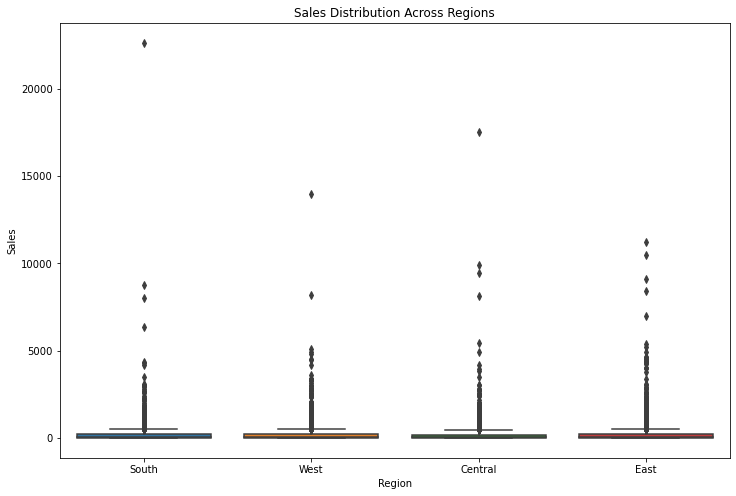

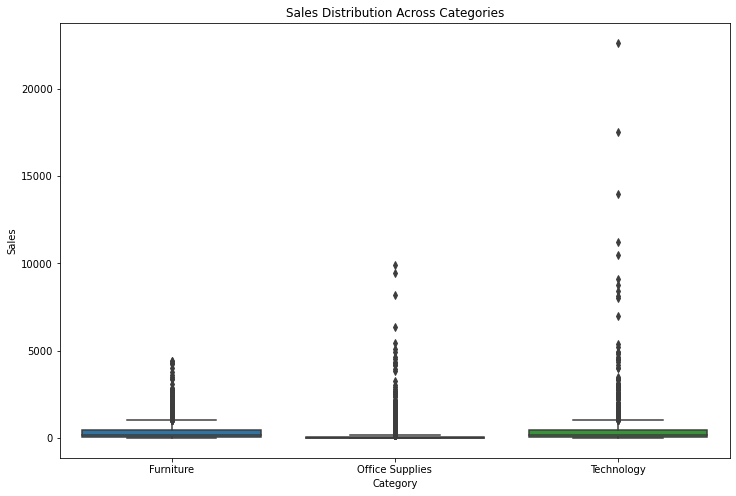

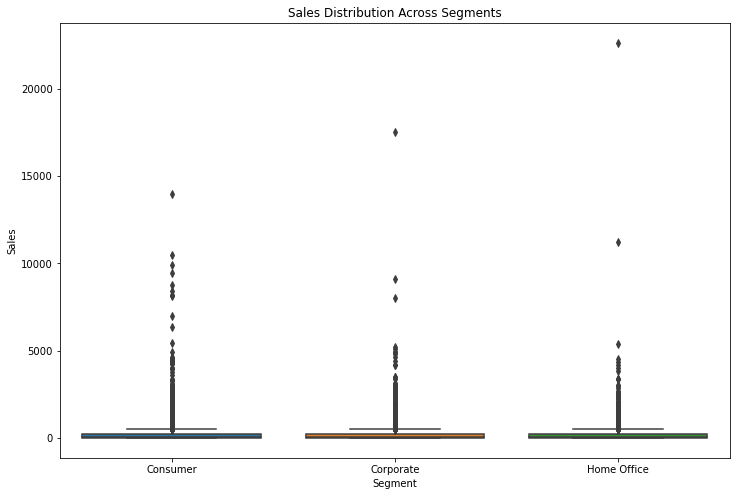

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Sales Distribution Across Segments')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

# 3) Analyze the overall profitability trend.

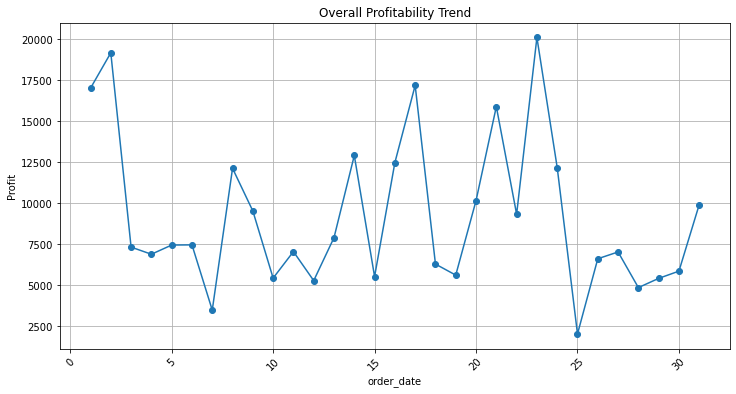

In [75]:
profitability_trend = df.groupby('order_date')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(profitability_trend['order_date'], profitability_trend['Profit'], marker='o', linestyle='-')
plt.title('Overall Profitability Trend')
plt.xlabel('order_date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

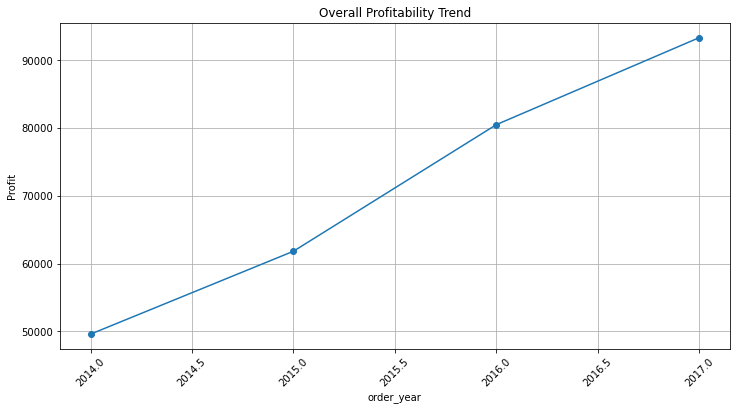

In [76]:
profitability_trend = df.groupby('order_year')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(profitability_trend['order_year'], profitability_trend['Profit'], marker='o', linestyle='-')
plt.title('Overall Profitability Trend')
plt.xlabel('order_year')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

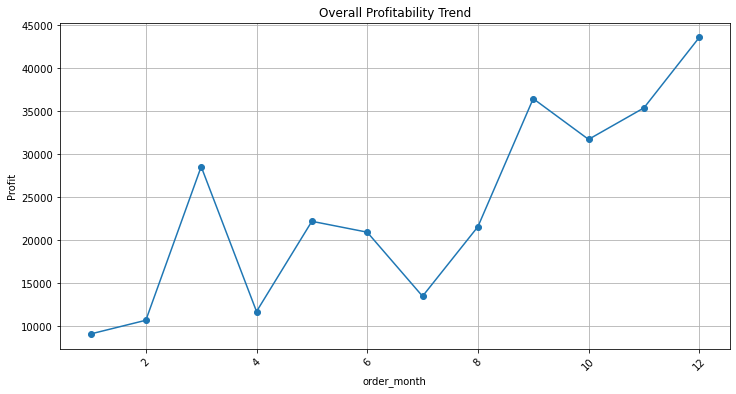

In [77]:
profitability_trend = df.groupby('order_month')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(profitability_trend['order_month'], profitability_trend['Profit'], marker='o', linestyle='-')
plt.title('Overall Profitability Trend')
plt.xlabel('order_month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4) Identify the least profitable products and categories.

In [78]:
least_profitable_products = df.groupby("Product Name")["Profit"].mean().nsmallest(5)
print("Least Profitable Products:")
print(least_profitable_products)

Least Profitable Products:
Product Name
Cubify CubeX 3D Printer Triple Head Print               -3839.990400
Cubify CubeX 3D Printer Double Head Print               -2959.990133
Cisco TelePresence System EX90 Videoconferencing Unit   -1811.078400
Lexmark MX611dhe Monochrome Laser Printer               -1147.493250
Zebra GK420t Direct Thermal/Thermal Transfer Printer     -938.280000
Name: Profit, dtype: float64


In [79]:
least_profitable_categories=df.groupby("Category")["Profit"].mean().nsmallest(3)
print("Least Profitable Categories:")
print(least_profitable_categories)

Least Profitable Categories:
Category
Furniture           8.299843
Office Supplies    20.703890
Technology         79.402216
Name: Profit, dtype: float64


# 5) Explore the relationship between discount and profit.

In [80]:
avg_profit_by_discount = df.groupby("Discount")["Profit"].mean()
avg_profit_by_discount

Discount
0.00     67.219086
0.10     96.215291
0.15     27.288298
0.20     24.698622
0.30    -46.146675
0.32    -88.560656
0.40   -112.501221
0.45   -226.646464
0.50   -315.772908
0.60    -43.118376
0.70    -96.478232
0.80   -100.906834
Name: Profit, dtype: float64

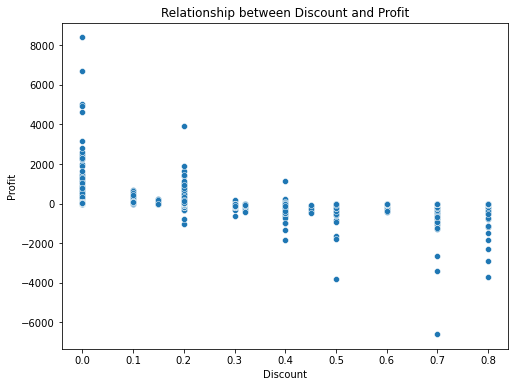

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Outlier Analysis

# Quantity Outlier Analysis 

In [82]:
#unique values 
df["Quantity"].unique()

array([ 2.,  3.,  5.,  7.,  4.,  6.,  9.,  1.,  8., 14., 11., 13., 10.,
       12.])

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


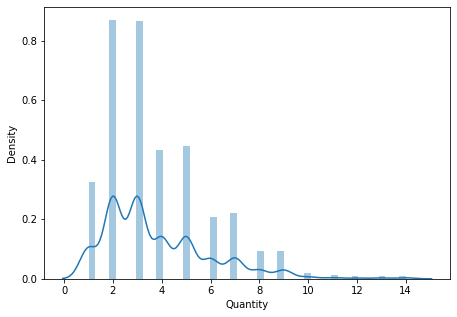

In [83]:
#distribution graph for quantity
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Quantity"])
plt.show()

In [84]:
#right skew
df["Quantity"].skew()

1.272389553355905

In [85]:
df["Quantity"].describe()

count    9844.000000
mean        3.790431
std         2.224033
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

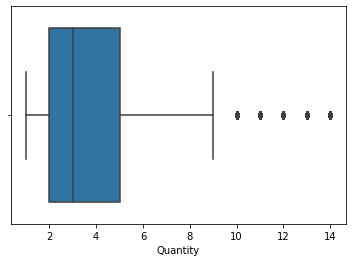

In [86]:
#box plot
sns.boxplot(df["Quantity"])

In [87]:
#Percentile Method
low=df["Quantity"].quantile(0.05)
high=df["Quantity"].quantile(0.95)
low,high

(1.0, 8.0)

In [88]:
df[df["Quantity"]>high]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9.0,0.2,85.3092,2014.0,6.0,9.0,2014.0,6.0,14.0
37,Standard Class,Home Office,United States,Houston,Texas,Central,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.328,9.0,0.2,35.4150,2015.0,12.0,27.0,2015.0,12.0,31.0
102,Second Class,Consumer,United States,Columbus,Ohio,East,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",40.096,14.0,0.2,14.5348,2014.0,8.0,25.0,2014.0,8.0,27.0
111,First Class,Consumer,United States,Wilmington,Delaware,East,Office Supplies,Envelopes,Globe Weis Peel & Seel First Class Envelopes,115.020,9.0,0.0,51.7590,2016.0,6.0,12.0,2016.0,6.0,15.0
124,Standard Class,Consumer,United States,Roseville,California,West,Furniture,Furnishings,Longer-Life Soft White Bulbs,43.120,14.0,0.0,20.6976,2016.0,10.0,13.0,2016.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,Standard Class,Consumer,United States,San Francisco,California,West,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,223.580,14.0,0.0,87.1962,2017.0,11.0,24.0,2017.0,11.0,30.0
9802,Standard Class,Consumer,United States,Anaheim,California,West,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9.0,0.0,29.9646,2014.0,12.0,28.0,2015.0,1.0,3.0
9839,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14.0,0.2,153.1152,2016.0,12.0,6.0,2016.0,12.0,10.0
9844,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10.0,0.0,15.1200,2015.0,5.0,17.0,2015.0,5.0,23.0


In [89]:
#did because felt outliers are valid (so used capping)

In [90]:
#capping outliers
df["Quantity"]=np.where(df["Quantity"]>high,high,np.where(df["Quantity"]<low,low,df["Quantity"]))

In [91]:
df.shape

(9844, 19)

In [92]:
df[df["Quantity"]>=5]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694,2014.0,6.0,9.0,2014.0,6.0,14.0
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6.0,0.20,90.7152,2014.0,6.0,9.0,2014.0,6.0,14.0
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0,0.00,34.4700,2014.0,6.0,9.0,2014.0,6.0,14.0
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,8.0,0.20,85.3092,2014.0,6.0,9.0,2014.0,6.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,Second Class,Consumer,United States,Atlanta,Georgia,South,Office Supplies,Paper,"Wirebound Message Book, 4 per Page",48.8700,8.0,0.00,23.9463,2017.0,11.0,25.0,2017.0,11.0,29.0
9861,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Paper,Xerox 19,154.9000,5.0,0.00,69.7050,2017.0,1.0,14.0,2017.0,1.0,19.0
9864,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,24.1000,5.0,0.00,11.0860,2016.0,9.0,1.0,2016.0,9.0,5.0
9869,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,"Wilson Jones 1"" Hanging DublLock Ring Binders",26.4000,5.0,0.00,12.6720,2016.0,9.0,1.0,2016.0,9.0,5.0


C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


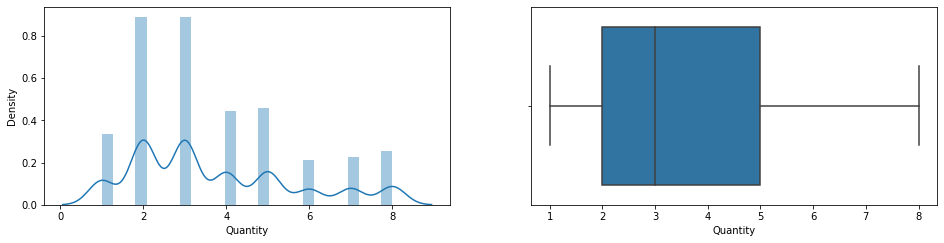

In [93]:
#distribution and box plot for quantity
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Quantity"])

plt.subplot(2,2,2)
sns.boxplot(df["Quantity"])
                
plt.show()

In [94]:
#right skew
df["Quantity"].skew()

0.7107622703947052

# Disount Outlier Analysis

In [95]:
#unique values in discount
df["Discount"].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


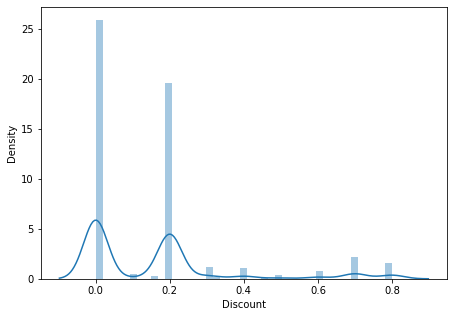

In [96]:
#distribution graph for discount
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Discount"])
plt.show()

In [97]:
#right skew
df["Discount"].skew()

1.6922053394888577

In [98]:
df["Discount"].describe()

count    9844.000000
mean        0.155312
std         0.205817
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

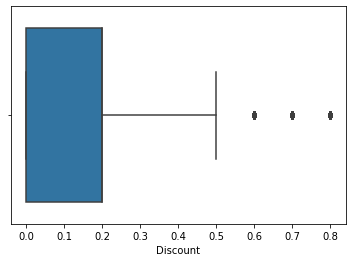

In [99]:
#boxplot
sns.boxplot(df["Discount"])

In [100]:
per25=df["Discount"].quantile(0.25)
per75=df["Discount"].quantile(0.75)
per25,per75

(0.0, 0.2)

In [101]:
#IQR(method)
iqr=per75-per25
low=per25-1.5*iqr
high=per75+1.5*iqr
low,high

(-0.30000000000000004, 0.5)

In [102]:
df[df["Discount"]>high]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5.0,0.8,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3.0,0.8,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.618,2.0,0.7,-7.0532,2015.0,9.0,17.0,2015.0,9.0,21.0
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858,6.0,0.7,-5.7150,2015.0,9.0,17.0,2015.0,9.0,21.0
36,First Class,Corporate,United States,Richardson,Texas,Central,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5.0,0.6,-147.9630,2016.0,12.0,8.0,2016.0,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,First Class,Home Office,United States,Cleveland,Ohio,East,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,8.700,5.0,0.7,-6.3800,2017.0,4.0,20.0,2017.0,4.0,21.0
9763,Standard Class,Consumer,United States,Carrollton,Texas,Central,Furniture,Furnishings,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",25.128,3.0,0.6,-6.9102,2014.0,11.0,12.0,2014.0,11.0,18.0
9780,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.386,7.0,0.8,-35.8176,2016.0,3.0,15.0,2016.0,3.0,19.0
9781,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,Acco Expandable Hanging Binders,5.742,3.0,0.7,-4.5936,2014.0,11.0,24.0,2014.0,11.0,30.0


In [103]:
#capping outliers with high and low values
df["Discount"]=np.where(df["Discount"]>high,high,np.where(df["Discount"]<low,low,df["Discount"]))

In [104]:
df.shape

(9844, 19)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


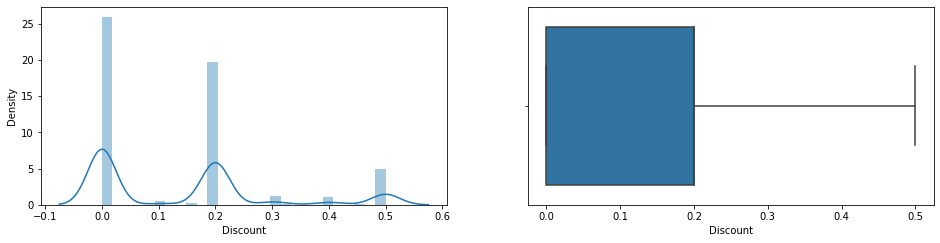

In [105]:
#distribution and box plot for discount
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Discount"])
plt.subplot(2,2,2)
sns.boxplot(df["Discount"])
             
plt.show()

In [106]:
df.shape

(9844, 19)

In [107]:
#right skew
df["Discount"].skew()

0.9644235759205968

# Profit Outlier Analysis

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


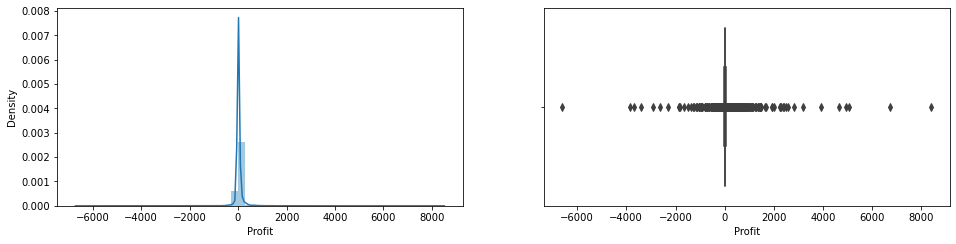

In [108]:
#distribution and boxplot graph for profit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Profit"])
plt.subplot(2,2,2)
sns.boxplot(df["Profit"])
plt.show()

In [109]:
#right skew
df["Profit"].skew()

7.532178434791842

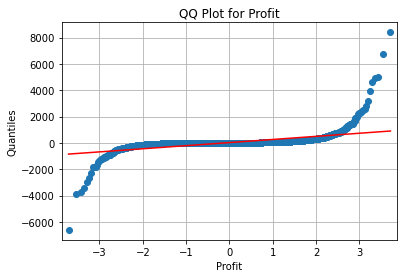

In [110]:
data = df

# Select the column you want to analyze
column_name = 'Profit'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [111]:
df[df["Profit"]<=0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.50,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3.0,0.50,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196,2017.0,7.0,16.0,2017.0,7.0,18.0
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522,2015.0,9.0,17.0,2015.0,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4.0,0.15,-40.1960,2015.0,11.0,13.0,2015.0,11.0,17.0
9797,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2.0,0.20,-1.7772,2016.0,6.0,3.0,2016.0,6.0,6.0
9822,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704,2015.0,3.0,19.0,2015.0,3.0,22.0
9837,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0,0.00,0.0000,2016.0,12.0,6.0,2016.0,12.0,10.0


<AxesSubplot:xlabel='Profit', ylabel='Sales'>

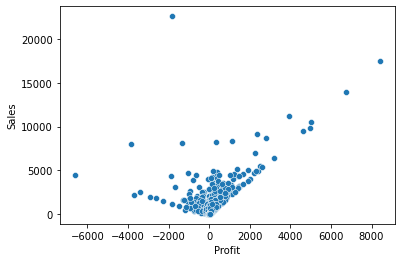

In [112]:
#scatterplot prfit vs sales
sns.scatterplot(x="Profit",y="Sales",data=df)

In [113]:
df[df["Profit"]<=0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.50,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3.0,0.50,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196,2017.0,7.0,16.0,2017.0,7.0,18.0
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522,2015.0,9.0,17.0,2015.0,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4.0,0.15,-40.1960,2015.0,11.0,13.0,2015.0,11.0,17.0
9797,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2.0,0.20,-1.7772,2016.0,6.0,3.0,2016.0,6.0,6.0
9822,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704,2015.0,3.0,19.0,2015.0,3.0,22.0
9837,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0,0.00,0.0000,2016.0,12.0,6.0,2016.0,12.0,10.0


In [114]:
EPSILON = 1e-8
positive_profit = df['Profit'] + EPSILON

# Take the absolute value
abs_profit = np.abs(positive_profit)

# Apply the logarithm
log_profit = np.log(abs_profit)

# Restore the sign
transformed_profit = np.sign(df['Profit']) * log_profit

# Replace -0 with 0
transformed_profit = np.where(transformed_profit == -0, 0, transformed_profit)

# Add the transformed profit column to the DataFrame
df['Transformed_Profit'] = transformed_profit

In [115]:
df[df["Profit"]==0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit
201,Standard Class,Home Office,United States,Tampa,Florida,South,Furniture,Furnishings,Tenex Contemporary Contur Chairmats for Low an...,258.072,3.0,0.2,0.0,2017.0,4.0,7.0,2017.0,4.0,12.0,0.0
509,Second Class,Consumer,United States,San Francisco,California,West,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,1121.568,2.0,0.2,0.0,2016.0,4.0,15.0,2016.0,4.0,17.0,0.0
520,First Class,Consumer,United States,Seattle,Washington,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",3.960,2.0,0.0,0.0,2015.0,12.0,7.0,2015.0,12.0,9.0,0.0
526,Standard Class,Corporate,United States,Seattle,Washington,West,Furniture,Chairs,Hon Every-Day Series Multi-Task Chairs,451.152,3.0,0.2,0.0,2017.0,10.0,1.0,2017.0,10.0,8.0,0.0
775,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,Global Leather Executive Chair,1228.465,5.0,0.3,0.0,2014.0,6.0,28.0,2014.0,7.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,First Class,Consumer,United States,Los Angeles,California,West,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2803.920,5.0,0.2,0.0,2015.0,1.0,27.0,2015.0,1.0,29.0,0.0
9501,Standard Class,Corporate,United States,Seattle,Washington,West,Office Supplies,Storage,"Contico 72""H Heavy-Duty Storage System",204.900,5.0,0.0,0.0,2014.0,3.0,7.0,2014.0,3.0,12.0,0.0
9746,Standard Class,Consumer,United States,Lafayette,Indiana,Central,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",5.940,3.0,0.0,0.0,2014.0,1.0,23.0,2014.0,1.0,27.0,0.0
9758,Standard Class,Consumer,United States,Fairfield,Ohio,East,Furniture,Furnishings,"Deflect-o EconoMat Nonstudded, No Bevel Mat",82.640,2.0,0.2,0.0,2016.0,6.0,6.0,2016.0,6.0,10.0,0.0


In [116]:
# sum of null values
df["Transformed_Profit"].isnull().sum()

0

In [117]:
df[df["Transformed_Profit"]<=0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0,-5.948116
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.50,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0,-4.819136
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3.0,0.50,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0,-1.339203
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196,2017.0,7.0,16.0,2017.0,7.0,18.0,-0.019410
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522,2015.0,9.0,17.0,2015.0,9.0,21.0,-7.417612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2.0,0.20,-1.7772,2016.0,6.0,3.0,2016.0,6.0,6.0,-0.575039
9804,Second Class,Home Office,United States,Seattle,Washington,West,Office Supplies,Storage,"Rogers Jumbo File, Granite",40.7400,3.0,0.00,0.4074,2015.0,4.0,12.0,2015.0,4.0,17.0,-0.897960
9822,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704,2015.0,3.0,19.0,2015.0,3.0,22.0,-4.214649
9837,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0,0.00,0.0000,2016.0,12.0,6.0,2016.0,12.0,10.0,0.000000


In [118]:
df.head() #top 5 rows

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016.0,11.0,8.0,2016.0,11.0,11.0,3.735610
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,2016.0,11.0,8.0,2016.0,11.0,11.0,5.391726
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016.0,6.0,12.0,2016.0,6.0,16.0,1.927368
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0,-5.948116
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,2015.0,10.0,11.0,2015.0,10.0,18.0,0.922829


C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


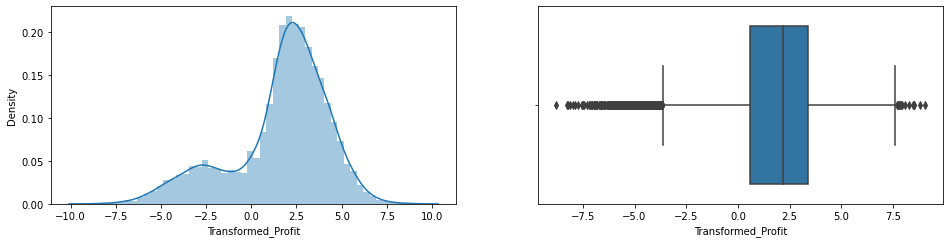

In [119]:
#distribution and boxplot for transformed profit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Transformed_Profit"])
plt.subplot(2,2,2)
sns.boxplot(df["Transformed_Profit"])
              
plt.show()

In [120]:
#left skew
df["Transformed_Profit"].skew()

-0.8874539960016707

In [121]:
df.shape

(9844, 20)

In [122]:
Q1 = df['Transformed_Profit'].quantile(0.25)
Q3 = df['Transformed_Profit'].quantile(0.75)

# Calculate IQR(Inter Quantile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Transformed_Profit'] >= lower_bound) & (df['Transformed_Profit'] <= upper_bound)]

In [123]:
df.shape

(9844, 20)

In [124]:
#copying data in df
df=df_no_outliers.copy()

In [125]:
df.shape

(9233, 20)

In [126]:
#sum of null values in transformed profit
df['Transformed_Profit'].isnull().sum()

0

In [127]:
df.shape

(9233, 20)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


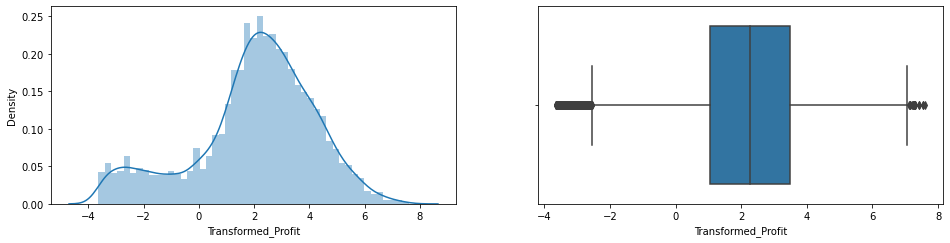

In [128]:
#distribution and box plot for transformed profit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Transformed_Profit"])
plt.subplot(2,2,2)
sns.boxplot(df["Transformed_Profit"])
                
plt.show()

In [129]:
df["Transformed_Profit"].skew()

-0.6187364044245487

In [130]:
#display all columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'order_year', 'order_month', 'order_date',
       'Ship_year', 'Ship_month', 'Ship_date', 'Transformed_Profit'],
      dtype='object')

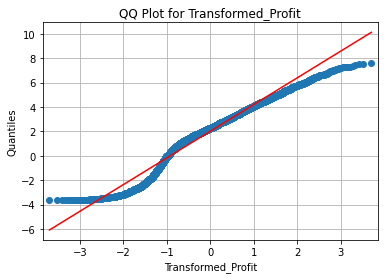

In [131]:
data = df

# Select the column you want to analyze
column_name = 'Transformed_Profit'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Transformed_Profit', ylabel='Sales'>

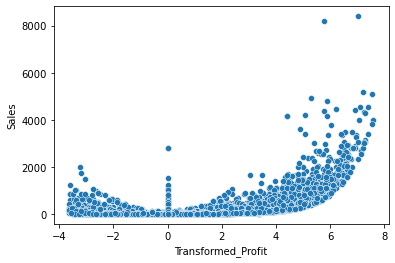

In [132]:
#Scatter plot sales vs transformed_profit
sns.scatterplot(x="Transformed_Profit",y="Sales",data=df)

# Sales Outlier Analysis

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


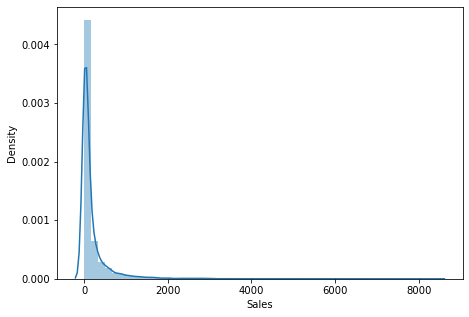

In [133]:
# sales data distribution graph

plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Sales"])
plt.show()

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

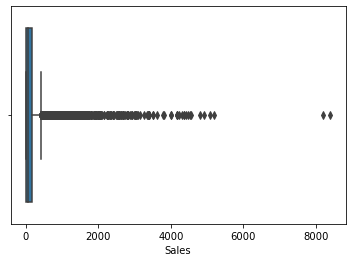

In [134]:
#box plot to check outliers
sns.boxplot(df["Sales"])

In [135]:
#checking skewnessin data
df["Sales"].skew() #right skew

5.945170113821082

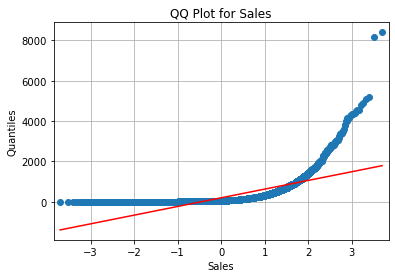

In [136]:
data = df

# Select the column you want to analyze
column_name = 'Sales'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [137]:
#data transformation using log
df['Transformed_Sales'] = np.log(df['Sales'])

In [138]:
df.head() #top 5 rows display

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit,Transformed_Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.0,41.9136,2016.0,11.0,8.0,2016.0,11.0,11.0,3.735610,5.568192
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3.0,0.0,219.5820,2016.0,11.0,8.0,2016.0,11.0,11.0,5.391726,6.595699
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.0,6.8714,2016.0,6.0,12.0,2016.0,6.0,16.0,1.927368,2.682390
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,2.5164,2015.0,10.0,11.0,2015.0,10.0,18.0,0.922829,3.107631
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7.0,0.0,14.1694,2014.0,6.0,9.0,2014.0,6.0,14.0,2.651085,3.888959


In [139]:
df.shape

(9233, 21)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


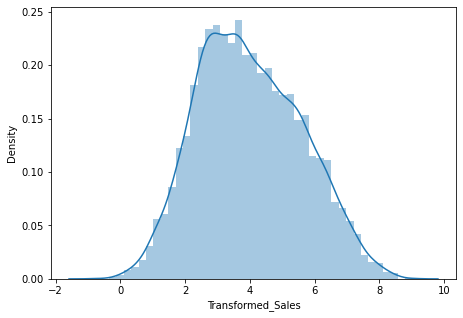

In [140]:
#distribution graph after transformation
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Transformed_Sales"])
plt.show()

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transformed_Sales'>

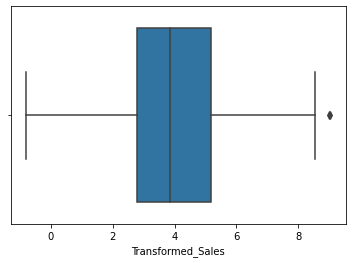

In [141]:
#boxplot 
sns.boxplot(df["Transformed_Sales"])

In [142]:
#right skewness
df["Transformed_Sales"].skew()

0.2193355558713904

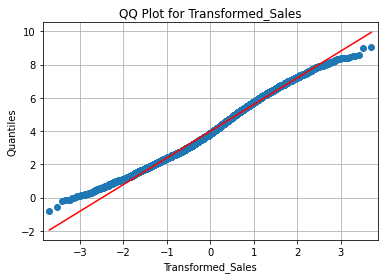

In [143]:
import statsmodels.api as sm
data = df

# Select the column you want to analyze
column_name = 'Transformed_Sales'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [144]:
df.shape

(9233, 21)

In [145]:
#z_score technique to delete outliers
z_scores = (df['Transformed_Sales'] - df['Transformed_Sales'].mean()) / df['Transformed_Sales'].std()
outliers = df[np.abs(z_scores) > 3] 

In [146]:
#drop outliers
df = df.drop(outliers.index)

In [147]:
df.shape

(9231, 21)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


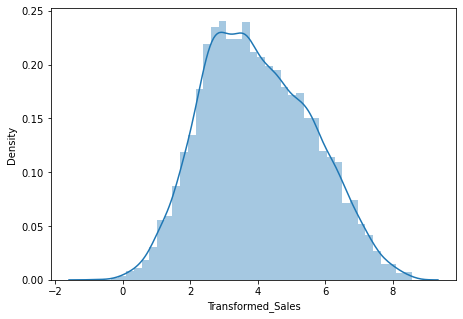

In [148]:
#distribution graph after outlier deletion
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Transformed_Sales"])
plt.show()

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transformed_Sales'>

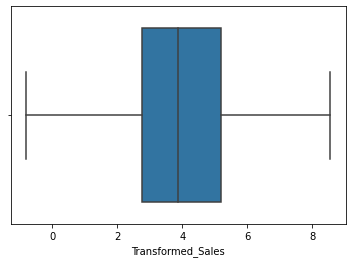

In [149]:
#box plot
sns.boxplot(df["Transformed_Sales"])

In [150]:
#skew
df["Transformed_Sales"].skew()

0.21540098687838372

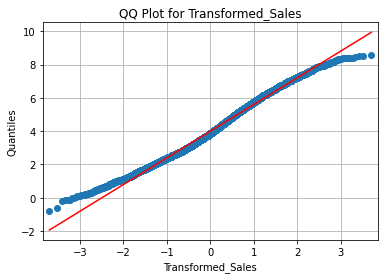

In [151]:
data = df

# Select the column you want to analyze
column_name = 'Transformed_Sales'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [152]:
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit,Transformed_Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.0,41.9136,2016.0,11.0,8.0,2016.0,11.0,11.0,3.735610,5.568192
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3.0,0.0,219.5820,2016.0,11.0,8.0,2016.0,11.0,11.0,5.391726,6.595699
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.0,6.8714,2016.0,6.0,12.0,2016.0,6.0,16.0,1.927368,2.682390
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,2.5164,2015.0,10.0,11.0,2015.0,10.0,18.0,0.922829,3.107631
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7.0,0.0,14.1694,2014.0,6.0,9.0,2014.0,6.0,14.0,2.651085,3.888959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,GBC Plastic Binding Combs,29.520,4.0,0.0,14.4648,2016.0,9.0,1.0,2016.0,9.0,5.0,2.671718,3.385068
9868,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Art,Newell 315,11.960,2.0,0.0,2.9900,2016.0,9.0,1.0,2016.0,9.0,5.0,1.095273,2.481568
9869,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,"Wilson Jones 1"" Hanging DublLock Ring Binders",26.400,5.0,0.0,12.6720,2016.0,9.0,1.0,2016.0,9.0,5.0,2.539395,3.273364
9870,Second Class,Corporate,United States,Fort Lauderdale,Florida,South,Office Supplies,Appliances,Hoover Upright Vacuum With Dirt Cup,1158.120,5.0,0.2,130.2885,2017.0,11.0,11.0,2017.0,11.0,16.0,4.869751,7.054553


# Statistical Analysis:

# Investigate the performance of different customer segments (Consumer, Corporate, Home Office) in terms of sales, quantity, and profit.

In [153]:
print(df.groupby('Segment').agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'}))

                   Sales  Quantity         Profit
Segment                                          
Consumer     880281.9858   17434.0  173357.412232
Corporate    558708.6391   10306.0  114919.723887
Home Office  340851.1344    6052.0   77291.453700


# Examine the contribution of each product category to overall sales.

In [154]:
total_sales = df['Sales'].sum()
category_sales = df.groupby('Category')['Sales'].sum()
category_contribution = (category_sales / total_sales) * 100
category_contribution

Category
Furniture          31.121490
Office Supplies    33.880769
Technology         34.997740
Name: Sales, dtype: float64

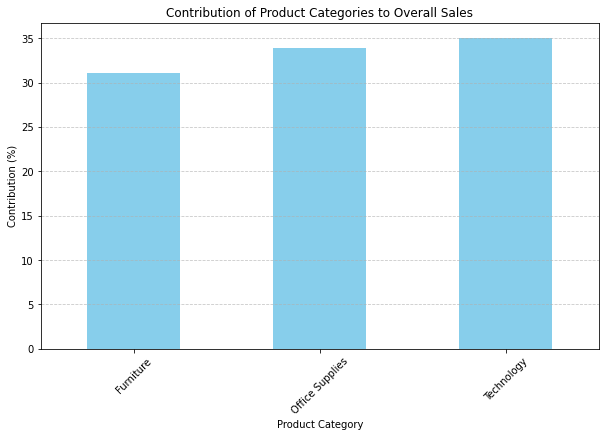

In [155]:
plt.figure(figsize=(10, 6))
category_contribution.plot(kind='bar', color='skyblue')
plt.title('Contribution of Product Categories to Overall Sales')
plt.xlabel('Product Category')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Compare the mean sales across different regions using statistical tests (e.g., ANOVA).

In [156]:
# Filter data for unique regions
unique_regions = df['Region'].unique()

# Perform ANOVA test for sales across different regions
anova_results = f_oneway(*[df[df['Region'] == region]['Sales'] for region in unique_regions])

print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("P-value:", anova_results.pvalue)

ANOVA Results:
F-statistic: 4.43162405867444
P-value: 0.004057174733622733


# Conduct pairwise comparisons to identify regions with significantly different sales

In [157]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have loaded your Superstore dataset into a pandas DataFrame named 'superstore_data'

# Fit ANOVA model
model = ols('Sales ~ Region', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Conduct Tukey's HSD test for pairwise comparisons
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['Sales'], groups=df['Region'], alpha=0.05)

# Print Tukey's HSD test results
print("Tukey's HSD test results:")
print(tukey_results)

# Interpret results
print("\nPairwise comparisons:")
print(tukey_results.summary())



Tukey's HSD test results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Central   East  18.3861 0.4352 -13.0315 49.8038  False
Central  South  22.8597 0.3582 -13.0387 58.7582  False
Central   West  42.2169  0.002  11.9083 72.5255   True
   East  South   4.4736  0.987 -29.7819 38.7291  False
   East   West  23.8308 0.1345  -4.5126 52.1742  False
  South   West  19.3572 0.4397  -13.884 52.5983  False
------------------------------------------------------

Pairwise comparisons:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Central   East  18.3861 0.4352 -13.0315 49.8038  False
Central  South  22.8597 0.3582 -13.0387 58.7582  False
Central   West  42.2169  0.002  11.9083 72.5255   True
   East  South   4.4736  0.987 -29.7819 38.7291  False
   East   West  

# Explore relationships between variables such as Sales, Quantity, Discount, and Profit

In [158]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.243554,-0.079578,0.815014
Quantity,0.243554,1.000000,-0.030481,0.192574
Discount,-0.079578,-0.030481,1.000000,-0.181416
Profit,0.815014,0.192574,-0.181416,1.000000


<AxesSubplot:>

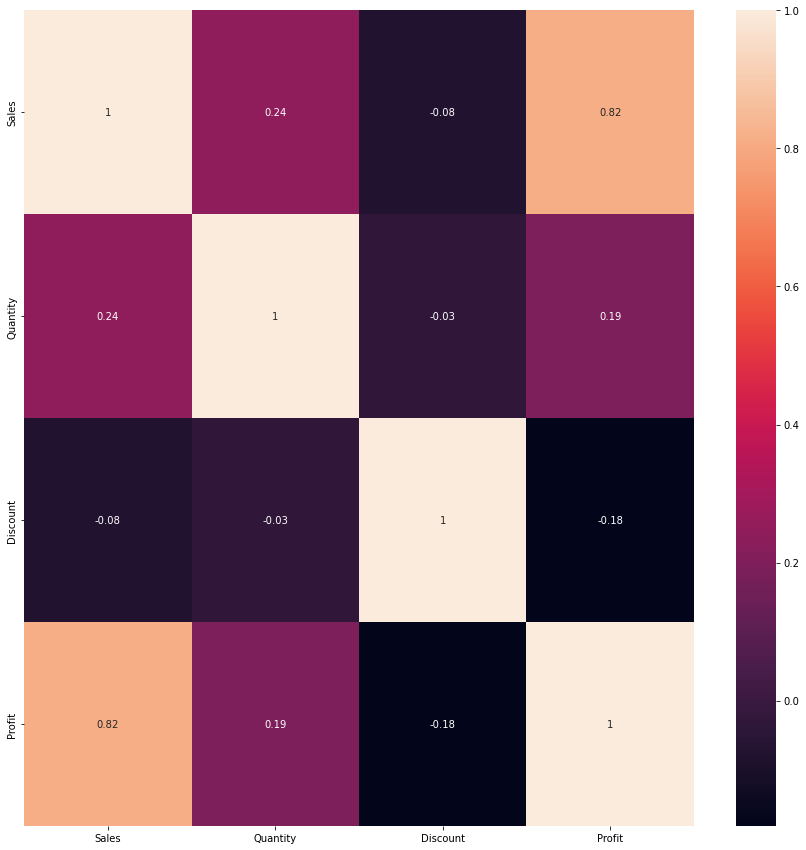

In [159]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(),annot=True)

# Identify regions with the highest and lowest sales and add this to the graph.

In [160]:
print("Region with highest sales: ",df.groupby("Region")["Sales"].sum().sort_values(ascending=False).index[0])

Region with highest sales:  West


In [161]:
print("Lowest Sales value: ",df.groupby("Region")["Sales"].sum().sort_values(ascending=False)[0])

Lowest Sales value:  650791.8735


In [162]:
print("Region with lowest sales: ",df.groupby("Region")["Sales"].sum().sort_values(ascending=True).index[0])

Region with lowest sales:  South


In [163]:
print("Lowest Sales value: ",df.groupby("Region")["Sales"].sum().sort_values(ascending=True)[0])

Lowest Sales value:  294632.523


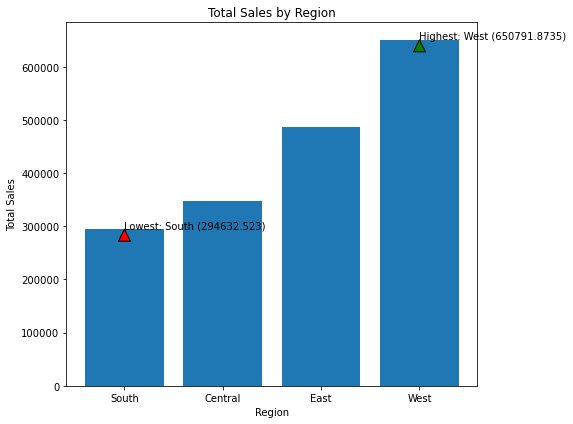

In [164]:
# Calculate total sales per region
total_sales = df.groupby("Region")["Sales"].sum()

# Sort total sales (ascending order for illustration)
sorted_sales = total_sales.sort_values(ascending=True)

# Get the region with the highest sales
highest_sales_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False).index[0]
highest_sales_value = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)[0]

# Get the region with the lowest sales
lowest_sales_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=True).index[0]
lowest_sales_value = df.groupby("Region")["Sales"].sum().sort_values(ascending=True)[0]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sorted_sales.index, sorted_sales.values)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")

# Add annotations for highest and lowest sales
plt.annotate(f"Highest: {highest_sales_region} ({highest_sales_value})",
             xy=(highest_sales_region, highest_sales_value),
             xytext=(highest_sales_region, highest_sales_value + 20),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(f"Lowest: {lowest_sales_region} ({lowest_sales_value})",
             xy=(lowest_sales_region, lowest_sales_value),
             xytext=(lowest_sales_region, lowest_sales_value - 20),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Identify the top-performing and underperforming products based on sales and profit.

In [165]:
df.groupby("Product Name")["Sales"].sum().nlargest(5)

Product Name
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    18810.652
GBC DocuBind TL300 Electric Binding System                                     15428.228
HON 5400 Series Task Chairs for Big and Tall                                   14019.600
Samsung Galaxy Mega 6.3                                                        13943.668
Hewlett Packard LaserJet 3310 Copier                                           13439.776
Name: Sales, dtype: float64

In [166]:
df.groupby("Product Name")["Sales"].sum().nsmallest(5)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Name: Sales, dtype: float64

In [167]:
df.groupby("Product Name")["Profit"].sum().nlargest(5)

Product Name
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    8007.2370
GBC DocuBind TL300 Electric Binding System                                     6395.5387
Hewlett Packard LaserJet 3310 Copier                                           4391.9268
Plantronics Savi W720 Multi-Device Wireless Headset System                     3696.2820
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room             3247.0200
Name: Profit, dtype: float64

In [168]:
df.groupby("Product Name")["Profit"].sum().nsmallest(5)

Product Name
Global Deluxe Steno Chair                         -157.8090
Hon 61000 Series Interactive Training Tables      -105.7434
Global Wood Trimmed Manager's Task Chair, Khaki    -90.0702
Eldon "L" Workstation Diamond Chairmat             -85.0976
Belkin 19" Vented Equipment Shelf, Black           -81.8532
Name: Profit, dtype: float64

# Visualize the sales and profit distribution for different products

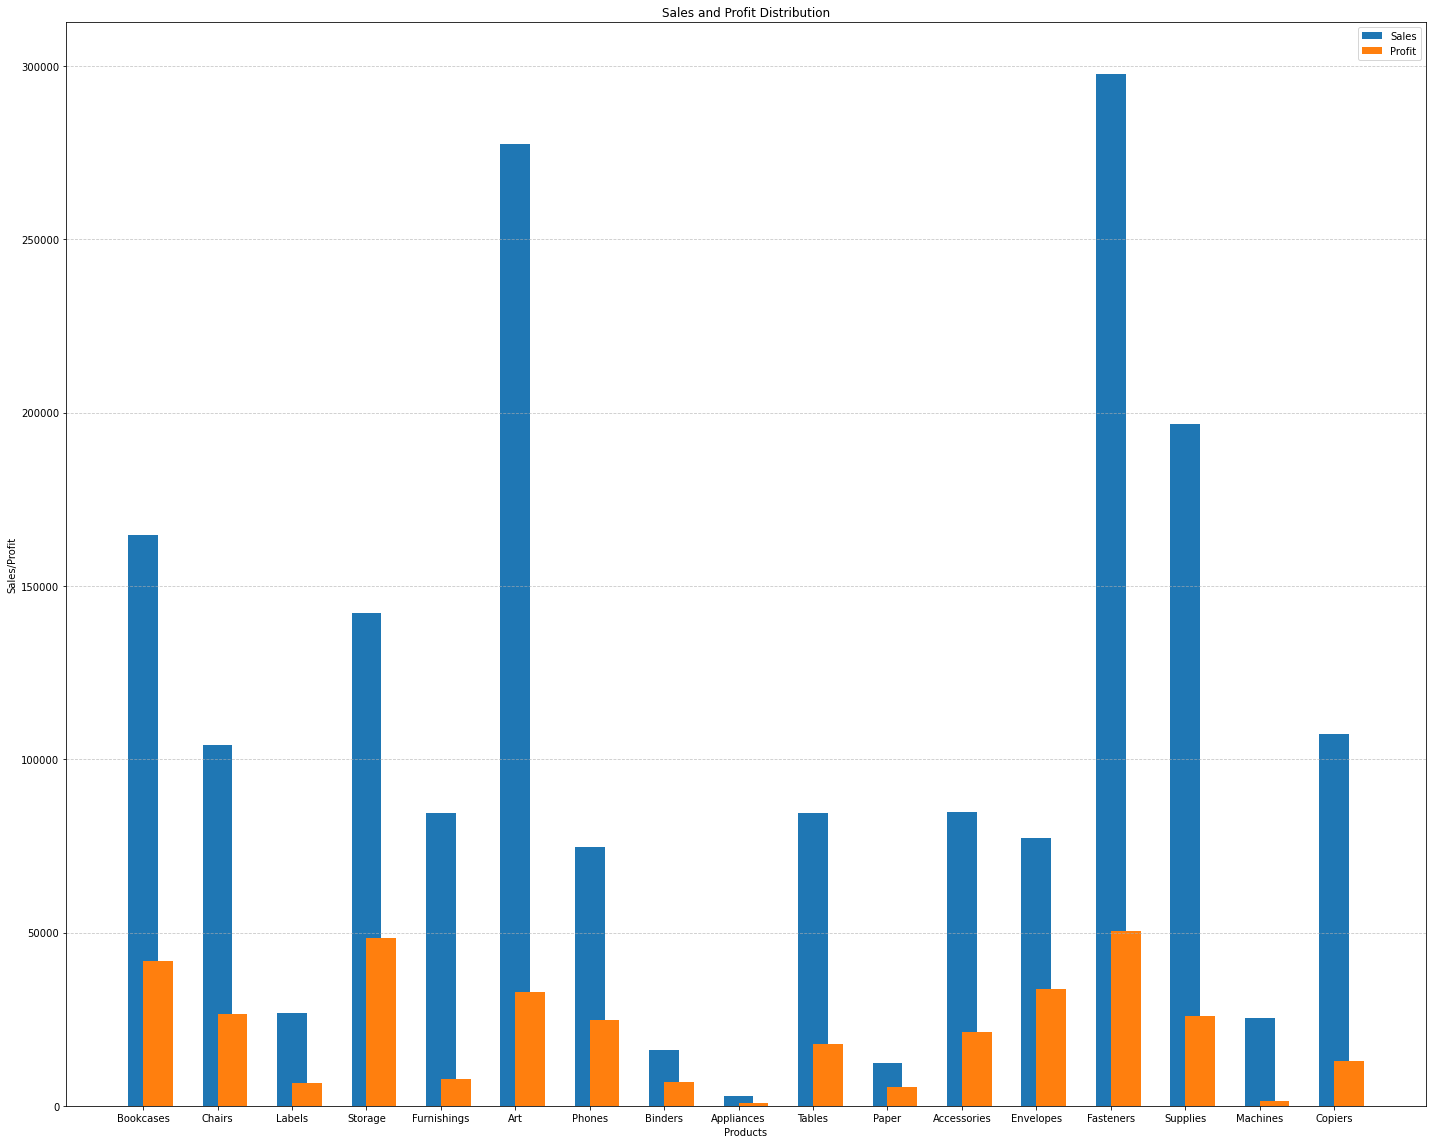

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
products = df["Sub-Category"].unique()
sales = df.groupby("Sub-Category")["Sales"].sum()
profit = df.groupby("Sub-Category")["Profit"].sum()

# Create a bar chart
plt.figure(figsize=(20, 16))
plt.bar(products, sales, label="Sales", width=0.4, align='center')
plt.bar([p for p in products], [p + 0.4 for p in profit], label="Profit", width=0.4, align='edge')  # Adjust bar positions to avoid overlap
plt.xlabel("Products")
plt.ylabel("Sales/Profit")
plt.title("Sales and Profit Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hypothesis Testing

# Formulate a hypothesis related to the data (e.g., the impact of discounts on sales).

# Conduct hypothesis testing using appropriate statistical tests.

In [174]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have loaded your Superstore dataset into a pandas DataFrame named 'superstore_data'

# Separate data into two groups: orders with discount and orders without discount
sales_with_discount = df[df['Discount'] > 0]['Sales']
sales_without_discount = df[df['Discount'] == 0]['Sales']

# Conduct two-sample t-test
t_statistic, p_value = ttest_ind(sales_with_discount, sales_without_discount)

# Print results
print("Two-sample t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in sales between orders with a discount and orders without a discount.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sales between orders with a discount and orders without a discount.")


Two-sample t-test results:
T-statistic: -2.1153451183517507
P-value: 0.034427263721101296
Reject the null hypothesis. There is a significant difference in sales between orders with a discount and orders without a discount.


In [175]:
# Separate data for positive and negative profit
positive_profit_sales = df[df['Profit'] > 0]['Sales']
negative_profit_sales = df[df['Profit'] < 0]['Sales']

# Perform two-sample t-test for profit and sales
t_statistic_profit, p_value_profit = ttest_ind(positive_profit_sales, negative_profit_sales)

# Print t-statistic and p-value
print("Profit vs Sales:")
print("t-statistic:", t_statistic_profit)
print("p-value:", p_value_profit)
alpha = 0.05
# Compare p-value to significance level
if p_value_profit < alpha:
    print("Reject null hypothesis: There is a significant difference in average sales between orders with positive and negative profit.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average sales between orders with positive and negative profit.")


Profit vs Sales:
t-statistic: 8.759604177903055
p-value: 2.3082619533422998e-18
Reject null hypothesis: There is a significant difference in average sales between orders with positive and negative profit.


In [176]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value_quantity = pearsonr(df['Quantity'], df['Sales'])

# Print correlation coefficient and p-value
print("Quantity vs Sales:")
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value_quantity)

# Compare p-value to significance level
if p_value_quantity < alpha:
    print("Reject null hypothesis: There is a significant correlation between quantity and sales.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between quantity and sales.")


Quantity vs Sales:
Correlation coefficient: 0.24355397761476383
p-value: 9.612120704587255e-125
Reject null hypothesis: There is a significant correlation between quantity and sales.


In [178]:
# Perform ANOVA test
category_groups = df.groupby('Category')['Sales'].apply(list)
f_statistic, p_value = f_oneway(*category_groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 372.7418591513791
p-value: 2.122671756864925e-156


In [179]:


# Perform ANOVA test
region_groups = df.groupby('Region')['Sales'].apply(list)
f_statistic, p_value = f_oneway(*region_groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 4.431624058674439
p-value: 0.004057174733622733


# Probability Analysis:

# What is the probability of an order being shipped using the "Standard Class" mode?

In [180]:
df["Ship Mode"].value_counts()

Standard Class    5475
Second Class      1817
First Class       1427
Same Day           512
Name: Ship Mode, dtype: int64

In [181]:
print("Total count ",len(df["Ship Mode"]))

Total count  9231


In [182]:
print("Standard Class ",len(df[df["Ship Mode"]=="Standard Class"]))

Standard Class  5475


In [183]:
print("Probability of an order being shipped using the Standard Class mode",len(df[df["Ship Mode"]=="Standard Class"])/len(df["Ship Mode"]))

Probability of an order being shipped using the Standard Class mode 0.5931101722456938


# Given that an order is shipped using "Second Class," what is the probability it is from the West region?

In [184]:
print("Total no of order shipped using second class",len(df[df["Ship Mode"]=="Second Class"]))

Total no of order shipped using second class 1817


In [185]:
print("Number of order shipped using second class and is from west region",len(df[(df["Ship Mode"]=="Second Class")&(df["Region"]=="West")]))

Number of order shipped using second class and is from west region 603


In [186]:
print("Probability that an order is shipped using Second Class ,it is from the West region ",len(df[(df["Ship Mode"]=="Second Class")&(df["Region"]=="West")])/len(df[df["Ship Mode"]=="Second Class"]))

Probability that an order is shipped using Second Class ,it is from the West region  0.3318657127132636


# What is the probability of a customer belonging to the "Corporate" segment?

In [187]:
df["Segment"].value_counts()

Consumer       4795
Corporate      2780
Home Office    1656
Name: Segment, dtype: int64

In [188]:
print("Total number of customers ",len(df))

Total number of customers  9231


In [189]:
print("Total number of customers from Corporate Segment ",len(df[df["Segment"]=="Corporate"]))

Total number of customers from Corporate Segment  2780


In [190]:
print("Probability of a customer belonging to the Corporate segment ",len(df[df["Segment"]=="Corporate"])/len(df))

Probability of a customer belonging to the Corporate segment  0.30115913768822444


# If a customer is from the "Home Office" segment, what is the probability they are from the East region?

In [191]:
print("Total number of customers from home ofiice and east region ",len(df[(df["Segment"]=="Home Office")&(df["Region"]=="East")]))

Total number of customers from home ofiice and east region  463


In [192]:
print("Total number of customers from home office segment ",len(df[df["Segment"]=="Home Office"]))

Total number of customers from home office segment  1656


In [193]:
print("Probability that customer is from the Home Office segment and are from the East region",len(df[(df["Segment"]=="Home Office")&(df["Region"]=="East")])/len(df[df["Segment"]=="Home Office"]))

Probability that customer is from the Home Office segment and are from the East region 0.27958937198067635


# What is the probability of a product having a discount greater than 20%?

In [194]:
print("Total number of Dicount greater than 20%: ",len(df[df["Discount"]>20/100]))

Total number of Dicount greater than 20%:  876


In [195]:
print("Total number of products: ",len(df))

Total number of products:  9231


In [196]:
print("Probability of a product having a discount greater than 20%: ",len(df[df["Discount"]>20/100])/len(df))

Probability of a product having a discount greater than 20%:  0.09489762755931101


# Given that a product has a discount, what is the probability that it is from the "Office Supplies" category?

In [197]:
print("Total number of products that as discount and are from office supplies category: ",len(df[(df["Category"]=="Office Supplies")&(df["Discount"]>0)]))

Total number of products that as discount and are from office supplies category:  2645


In [198]:
print("Total number of products that have discount: ",len(df[(df["Discount"]>0)]))

Total number of products that have discount:  4501


In [199]:
print("Probability that a product with a discount is from the 'Office Supplies' category: ",len(df[(df["Category"]=="Office Supplies")&(df["Discount"]>0)])/len(df[(df["Discount"]>0)]))

Probability that a product with a discount is from the 'Office Supplies' category:  0.5876471895134414


# What is the probability of a product having a negative profit?

In [200]:
print("Total number of products: ",len(df["Product Name"]))

Total number of products:  9231


In [201]:
print("Total number of products having negative profit: ",len(df[df["Profit"]<0]))

Total number of products having negative profit:  1235


In [202]:
print("Probability of a product having a negative profit: ",len(df[df["Profit"]<0])/len(df["Product Name"]))

Probability of a product having a negative profit:  0.1337883219586177


# Given that a product is in the "Furniture" category, what is the probability it has a positive profit?

In [203]:
print("Total number of products in the furniture category: ",len(df[df["Category"]=="Furniture"]))

Total number of products in the furniture category:  1772


In [204]:
print("Total number of products in the furniture category that has positive profit :",len(df[(df["Category"]=="Furniture")&(df["Profit"]>0)]))

Total number of products in the furniture category that has positive profit : 1352


In [205]:
print("Probability that a product in the 'Furniture' category has a positive profit: ",len(df[(df["Category"]=="Furniture")&(df["Profit"]>0)])/len(df[df["Category"]=="Furniture"]))

Probability that a product in the 'Furniture' category has a positive profit:  0.7629796839729119


# What is the probability of an order being shipped to California?

In [206]:
print("Probability of an order being shipped to California: ",len(df[df["State"]=="California"])/len(df))

Probability of an order being shipped to California:  0.210486404506554


# Given that an order is shipped to New York, what is the probability it is from the "Consumer" segment?

In [207]:
print("Probability that an order shipped to New York is from the 'Consumer' segment: ",len(df[(df["State"]=="New York")&(df["Segment"]=="Consumer")])/len(df[df["State"]=="New York"]))

Probability that an order shipped to New York is from the 'Consumer' segment:  0.5743305632502308
